## Дополонение к семинару 2:


**Задача восстановления регрессии. Lasso- и Ridge-регрессия**

In [38]:
%matplotlib inline
import numpy as np
import pandas as pd
from cycler import cycler
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing
   
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import KFold, cross_val_score

**Будем работать с набором данных по ценам на дома в Бостоне (репозиторий UCI).**
**Загружаем данные. Обратите внимание, что в `sklearn` есть свои различные наборы данных**

In [1]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X, y = housing["data"], housing["target"]

**Через `DESCR` можно просмотреть и прочитать с каким набором данных будем работать:**

In [2]:
# print(housing.DESCR)

In [42]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

**Признаки:**
- MedInc медианный доход в квартальной группе
- HouseAge средний возраст дома в квартальной группе
- AveRooms среднее количество комнат на household 
- AveBedrms среднее количество спален на household 
- Population население квартальной группы
- AveOccup среднее количество членов household 
- Latitude      квартальная группа широта
- Longitude квартальная группа долгота

Целевая переменная - медианная стоимость дома для районов Калифорнии,
выраженная в сотнях тысяч долларов ($100_000).


In [43]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [9]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [44]:
X = pd.DataFrame(X, columns  = ['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude'])

X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [45]:
y = pd.DataFrame(y, columns  = ['MEDV'])
y

,MEDV
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


**Посмотрим на первые 2 записи.**

In [10]:
X[:2]

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02]])

## Lasso-регрессия

Мы уже знаем, что переобучение нередко приводит к большим значениям коэффициентов.
Чтобы решить проблему, добавляют регуляризацию. Есть опреденные нейминги для линейных моделей, которые используют разные типы регуляризаций.

Lasso-регрессия решает задачу минимизации среднеквардатичной ошибки с L1-регуляризацией:
$$\Large error(X, y, w) = \frac{1}{2} \sum_{i=1}^\ell {(y_i - w^Tx_i)}^2 + \alpha \sum_{i=1}^d |w_i|$$

где $y = w^Tx$ – уравнение гиперплоскости, зависящее от параметров модели $w$, $\ell$-число объектов в выборке $X$, $d$ – число признаков, $y$ – значения целевого признака, $\alpha$ – коэффициент регуляризации, $\alpha$ контролирует баланс между
подгонкой под обучающую выборку и штрафом за излишнюю сложность. Разумеется, значение данного параметра следует подбирать под каждую задачу.

**Обучим Lasso-регрессию с небольшим коэффициентом $\alpha$ (слабая регуляризация). Обнуляется только коэффициент при признаках AveRooms и  AveBedrms. Значит, они наименее важны для предсказания целевого признака – медианной стоимости домов в районе.**


In [46]:
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
lasso.coef_

array([ 3.90582557e-01,  1.50821512e-02, -0.00000000e+00,  0.00000000e+00,
        1.75019561e-05, -3.32253135e-03, -1.14214430e-01, -9.92250689e-02])

In [47]:
lasso.feature_names_in_ 

array(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude'], dtype=object)

**Обучим Lasso-регрессию с коэффициентом $\alpha=10$. Теперь ненулевые коэффициенты остались только при признаке Population.**

In [48]:
lasso = Lasso(alpha=10)
lasso.fit(X, y)
lasso.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -1.73196994e-05, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00])

**Таким образом, Lasso-регрессия служит методом отбора признаков.**

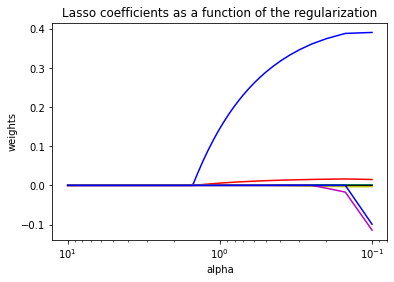

In [49]:
n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)
model = Lasso()

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)

ax = plt.gca()
ax.set_prop_cycle(cycler("color", ["b", "r", "g", "c", "k", "y", "m"]))

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Lasso coefficients as a function of the regularization")
plt.axis("tight")
plt.show();

**Теперь определим лучшее значение $\alpha$ в процессе кросс-валидации.**

In [51]:
lasso_cv = LassoCV(alphas=alphas, cv=3, random_state=17)
lasso_cv.fit(X, y)

C:\Users\nadya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=array([ 0.1       ,  0.14974874,  0.19949749,  0.24924623,  0.29899497,
        0.34874372,  0.39849246,  0.44824121,  0.49798995,  0.54773869,
        0.59748744,  0.64723618,  0.69698492,  0.74673367,  0.79648241,
        0.84623116,  0.8959799 ,  0.94572864,  0.99547739,  1.04522613,
        1.09497487,  1.14472362,  1.19447236,  1.24422111,  1.29396985,
        1.34371859,  1.39346734,  1.44321608,  1.49296482,  1.54271357,
        1.5924...
        8.30854271,  8.35829146,  8.4080402 ,  8.45778894,  8.50753769,
        8.55728643,  8.60703518,  8.65678392,  8.70653266,  8.75628141,
        8.80603015,  8.85577889,  8.90552764,  8.95527638,  9.00502513,
        9.05477387,  9.10452261,  9.15427136,  9.2040201 ,  9.25376884,
        9.30351759,  9.35326633,  9.40301508,  9.45276382,  9.50251256,
        9.55226131,  9.60201005,  9.65175879,  9.70150754,  9.75125628,
        9.80100503,  9.85075377,  9.90050251,  9.95025126, 10.        ]),
        cv=3, random_state=17)

In [52]:
lasso_cv.coef_

array([ 3.90582557e-01,  1.50821512e-02, -0.00000000e+00,  0.00000000e+00,
        1.75019561e-05, -3.32253135e-03, -1.14214430e-01, -9.92250689e-02])

In [53]:
lasso_cv.alpha_

0.1

**Метод `cross_val_score` максимизирует метрику, так что вместо 
минимизации MSE сделаем максимизацию отрицательного MSE – `neg_mean_squared_error`.**

In [54]:
cross_val_score(Lasso(lasso_cv.alpha_), X, y, cv=3, scoring="neg_mean_squared_error")

array([-0.64089532, -0.55316003, -0.79826342])

**Чтобы все-таки трактовать результат в терминах MSE, выведем модуль среднего значения метрики `neg_mean_squared_error` на кросс-валидации.**

In [55]:
abs(
    np.mean(
        cross_val_score(
            Lasso(lasso_cv.alpha_), X, y, cv=3, scoring="neg_mean_squared_error"
        )
    )
)

0.6641062550311728

In [56]:
abs(np.mean(cross_val_score(Lasso(9.95), X, y, cv=3, scoring="neg_mean_squared_error")))

1.3449906190202157

**Еще один неоднозначный момент: LassoCV сортирует значения параметров по убыванию – так проще оптимизировать. Из-за этого может показаться, что оптимизация параметра $\alpha$ работает неправильно**

In [ ]:
lasso_cv.alphas[:10]  # значения параметров на входе

In [ ]:
lasso_cv.alphas_[:10]  # преобразованные значения параметров

In [ ]:
plt.plot(lasso_cv.alphas, lasso_cv.mse_path_.mean(1))  # неверно
plt.axvline(lasso_cv.alpha_, c="g");

In [ ]:
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_.mean(1))  # верно
plt.axvline(lasso_cv.alpha_, c="g");

## Ridge-регрессия

Ridge-регрессия (или гребневая регрессия) решает задачу минимизации среднеквардатичной ошибки с L2-регуляризацией:
$$\Large error(X, y, w) = \frac{1}{2} \sum_{i=1}^\ell {(y_i - w^Tx_i)}^2 + \alpha \sum_{i=1}^d w_i^2$$

где $y = w^Tx$ – уравнение гиперплоскости, зависящее от параметров модели $w$, $\ell$-число объектов в выборке $X$, $d$ – число признаков, $y$ – значения целевого признака, $\alpha$ – коэффициент регуляризации.

В sklearn реализован специальный класс [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV) для кросс-валидации с Ridge-регрессией.

In [57]:
n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)

In [58]:
ridge_cv = RidgeCV(alphas=ridge_alphas, scoring="neg_mean_squared_error", cv=3)
ridge_cv.fit(X, y)

RidgeCV(alphas=array([1.00000000e-02, 1.09698580e-02, 1.20337784e-02, 1.32008840e-02,
       1.44811823e-02, 1.58856513e-02, 1.74263339e-02, 1.91164408e-02,
       2.09704640e-02, 2.30043012e-02, 2.52353917e-02, 2.76828663e-02,
       3.03677112e-02, 3.33129479e-02, 3.65438307e-02, 4.00880633e-02,
       4.39760361e-02, 4.82410870e-02, 5.29197874e-02, 5.80522552e-02,
       6.36824994e-02, 6.98587975e-0...
       1.18953407e+05, 1.30490198e+05, 1.43145894e+05, 1.57029012e+05,
       1.72258597e+05, 1.88965234e+05, 2.07292178e+05, 2.27396575e+05,
       2.49450814e+05, 2.73644000e+05, 3.00183581e+05, 3.29297126e+05,
       3.61234270e+05, 3.96268864e+05, 4.34701316e+05, 4.76861170e+05,
       5.23109931e+05, 5.73844165e+05, 6.29498899e+05, 6.90551352e+05,
       7.57525026e+05, 8.30994195e+05, 9.11588830e+05, 1.00000000e+06]),
        cv=3, scoring='neg_mean_squared_error')

In [59]:
ridge_cv.alpha_

0.01

**В случае Ridge-регрессии никакие праметры не зануляются – они могут быть очень малыми, но не нулевыми.**

In [60]:
ridge_cv.coef_

array([[ 4.36692302e-01,  9.43579421e-03, -1.07320146e-01,
         6.45055646e-01, -3.97632893e-06, -3.78654081e-03,
        -4.21314228e-01, -4.34513465e-01]])

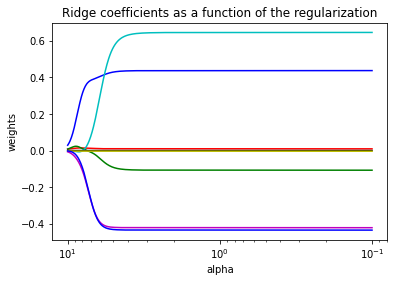

In [29]:
n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)
ridge_alphas = np.logspace(-2, 6, n_alphas)
model = Ridge()

coefs = []
for a in ridge_alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)

ax = plt.gca()
ax.set_prop_cycle(cycler("color", ["b", "r", "g", "c", "k", "y", "m"]))

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()